#### Connect to google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Import necessary libraries

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import os

#### Create training and validation dataset

In [4]:
train_dir = '/content/drive/MyDrive/CNN/dataset'
img_height, img_width = 150, 150
batch_size = 2

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 192 images belonging to 4 classes.
Found 48 images belonging to 4 classes.


#### Define Architecture

In [7]:
from tensorflow.keras.metrics import Precision, Recall
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

#### Train the model

In [8]:
epochs = 100

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 103s 980ms/step - accuracy: 0.3955 - loss: 4.3576 - precision: 0.4247 - recall: 0.3915 - val_accuracy: 0.2500 - val_loss: 3.3344 - val_precision: 0.2500 - val_recall: 0.2500
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4206 - loss: 4.3171 - precision: 0.4175 - recall: 0.3858 - val_accuracy: 0.2500 - val_loss: 6.9938 - val_precision: 0.2500 - val_recall: 0.2500
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.5498 - loss: 3.1933 - precision: 0.5474 - recall: 0.5360 - val_accuracy: 0.2917 - val_loss: 4.2137 - val_precision: 0.2917 - val_recall: 0.2917
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.5528 - loss: 2.7299 - precision: 0.5471 - recall: 0.5297 - val_accuracy: 0.5208 - val_loss: 2.4894 - val_precision: 0.5556 - val_recall: 0.5208
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.5493 - loss: 2.9590 - precision: 0.5677 - recall: 0.5388 - val_accuracy: 0.6042 - val_loss:

#### Save Model

In [9]:
model.save('model.h5')

#### Evaluate Model

In [12]:
loss, accuracy, precision, recall = model.evaluate(validation_generator)
print("Loss:",loss)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7935 - loss: 1.2474 - precision: 0.8132 - recall: 0.7737
Loss: 1.5176581144332886
Accuracy: 0.7291666865348816
Precision: 0.7555555701255798
Recall: 0.7083333134651184


#### Make predictions

In [13]:
!ls /content/drive/MyDrive/CNN/not_to_train

bat_1.jpg  dolphin_1.jpg  elephant_1.jpg  flamingo_1.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step
The image is classified as: flamingo


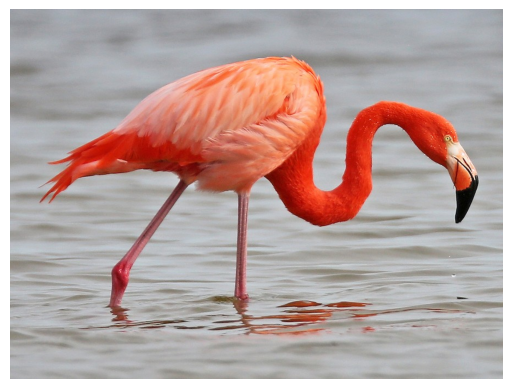

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
The image is classified as: elephant


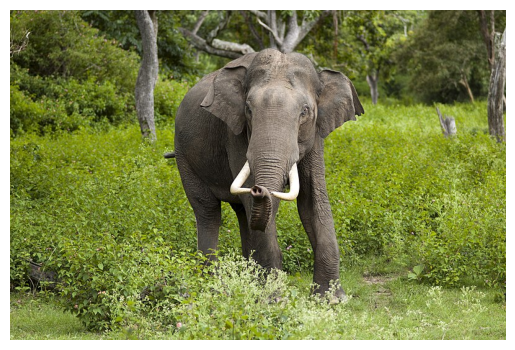

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
The image is classified as: dolphin


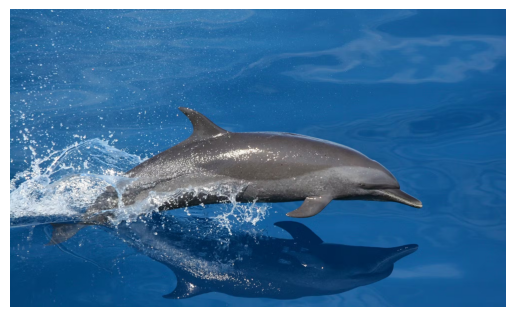

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
The image is classified as: bat


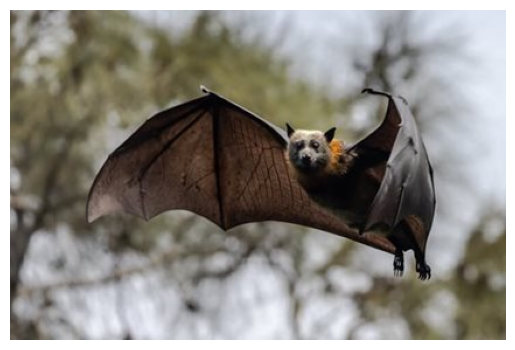

In [14]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    class_labels = list(train_generator.class_indices.keys())
    return class_labels[predicted_class[0]]


directory = '/content/drive/MyDrive/CNN/not_to_train/'

files_and_dirs = os.listdir(directory)
files = [f for f in files_and_dirs if os.path.isfile(os.path.join(directory, f))]

for f in files:
  if f.endswith(".jpg"):
    result = predict_image(os.path.join(directory, f))
    print(f"The image is classified as: {result}")

    img = mpimg.imread(os.path.join(directory, f))  # Replace with your image path
    plt.imshow(img)
    plt.axis("off")  # Hide axes
    plt.show()


#### Transfer learning

In [16]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(4, activation='softmax')
])
from tensorflow.keras.metrics import Precision, Recall

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
epochs = 100

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.5154 - loss: 1.4323 - precision_1: 0.5617 - recall_1: 0.3094 - val_accuracy: 0.8125 - val_loss: 0.6480 - val_precision_1: 0.8889 - val_recall_1: 0.6667
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.8272 - loss: 0.5719 - precision_1: 0.8759 - recall_1: 0.6797 - val_accuracy: 0.7708 - val_loss: 0.5059 - val_precision_1: 0.8605 - val_recall_1: 0.7708
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.8312 - loss: 0.4540 - precision_1: 0.8706 - recall_1: 0.8289 - val_accuracy: 0.7917 - val_loss: 0.4299 - val_precision_1: 0.8222 - val_recall_1: 0.7708
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.8751 - loss: 0.3753 - precision_1: 0.8835 - recall_1: 0.8385 - val_accuracy: 0.8125 - val_loss: 0.5133 - val_precision_1: 0.8409 - val_recall_1: 0.7708
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9185 - loss: 0.2634 - precision_1: 0.9442 - recall_1: 0.8948 

In [20]:
loss, accuracy, precision, recall = model.evaluate(validation_generator)
print("Loss:",loss)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8966 - loss: 0.4920 - precision_1: 0.8966 - recall_1: 0.8966
Loss: 0.6514894366264343
Accuracy: 0.8958333134651184
Precision: 0.8958333134651184
Recall: 0.8958333134651184


#### Confusion Matrix

Found 240 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step


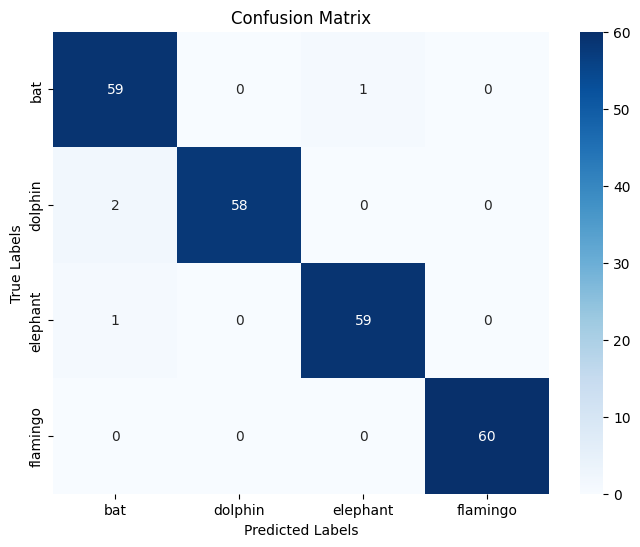

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/CNN/dataset',
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
true_labels = test_generator.classes
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()